Installed Required Packages

In [30]:
!pip install scikit-learn==1.5.2
!pip install keras-tuner
!pip install imblearn
!pip install tensorflow
!pip install xgboost
!pip install keras

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import optimizers
import keras_tuner as kt
from tensorflow.keras import layers, models
from tensorflow.keras.layers import LSTM, Dense
from sklearn.base import BaseEstimator, TransformerMixin

Read the dataset in the form of .csv file

In [32]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Check for missing values:

In [35]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


<Axes: >

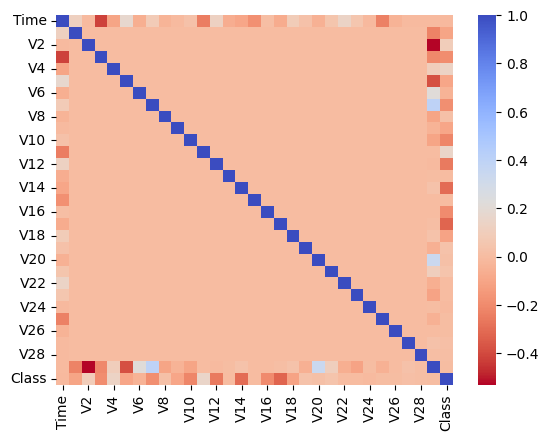

In [36]:
sns.heatmap(df.corr(), cmap='coolwarm_r', annot_kws={'size':20})

Checking for Class Imbalance and found an imbalance in dataset

In [38]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


<BarContainer object of 2 artists>

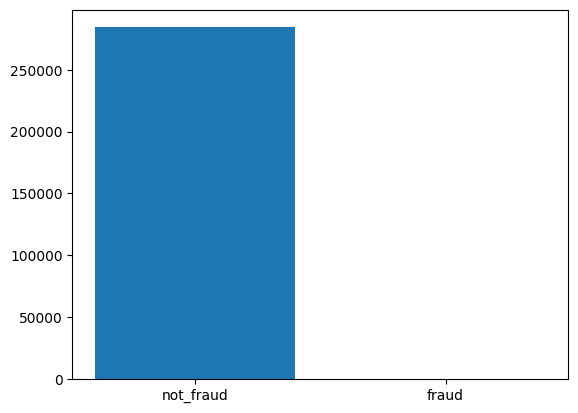

In [39]:
plt.bar(['not_fraud','fraud'],df['Class'].value_counts())

Checking for Correlation between target and independent variables

In [40]:
df.corr()['Class']

,Class
Time,-0.012323
V1,-0.101347
V2,0.091289
V3,-0.192961
V4,0.133447
V5,-0.094974
V6,-0.043643
V7,-0.187257
V8,0.019875
V9,-0.097733


Dividing the Dataset into target column as y and independent columns as x

In [41]:
X=df.drop('Class',axis=1)
y=df['Class']

Synthetic Minority Over-sampling Technique (SMOTE) to address Class Imbalance

In [42]:
smote=SMOTE(sampling_strategy='minority')
smote_x,smote_y=smote.fit_resample(X,y)
smote_y.value_counts()

,count
Class,
0,284315
1,284315


Function for Hyperparametric tunning by GridSearchCV

In [43]:
def hyp(j,X_train,y_train):
  s=[]
  for m,p in j.items():
    try:
      GV=GridSearchCV(p['model'],p['parameter'],cv=5,scoring='matthews_corrcoef')
      GV.fit(X_train,y_train)
      s.append({'model_name':m,'model_param':GV.best_params_,'score':GV.best_score_})
    except:
      pass
  return(s)

List of Hyper parameters in JSON format

In [44]:
j_smote={
    'logistic':{
        'model':LogisticRegression(),
        'parameter':
        {
            'C': [10, 20],
            'solver': ['liblinear', 'lbfgs']
        }
    },

    'XGBoost':{
    'model': XGBClassifier(),
    'parameter':
     {
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5],
            'n_estimators': [100,300],
            'subsample': [0.7, 1],
           'colsample_bytree': [0.7,1.0],
            'gamma': [0, 0.1]
        }
    }

}

Dataset Normalization

In [63]:
scaler = StandardScaler()
smote_x = scaler.fit_transform(smote_x)
X_trains, X_tests, y_trains, y_tests = train_test_split(smote_x,smote_y,test_size=0.3,random_state=42)

Anomaly Detection

In [46]:
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso_forest.fit(X_trains)
train_anomalies = iso_forest.predict(X_trains)
test_anomalies = iso_forest.predict(X_tests)
X_trains = X_trains[train_anomalies == 1]
y_trains = y_trains[train_anomalies == 1]
X_tests = X_tests[test_anomalies == 1]
y_tests = y_tests[test_anomalies == 1]

Finding the optimum values of the Hyper parameters

In [47]:
s=pd.DataFrame(hyp(j_smote,X_trains,y_trains))
s.to_csv('results.csv')

In [48]:
s

,model_name,model_param,score
0,logistic,"{'C': 20, 'solver': 'liblinear'}",0.960989
1,XGBoost,"{'colsample_bytree': 0.7, 'gamma': 0.1, 'learn...",0.999544


Same process for addressing the Class Imbalance by different Class Weights

In [135]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
iso_forest.fit(X_train)
train_anomalies = iso_forest.predict(X_train)
test_anomalies = iso_forest.predict(X_test)
X_train = X_train[train_anomalies == 1]
y_train = y_train[train_anomalies == 1]
X_test = X_test[test_anomalies == 1]
y_test = y_test[test_anomalies == 1]

Calculating the suitable class weights by balancing the two labels in the target value

In [69]:
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
scale_pos_weight = class_weights[0] / class_weights[1]

List of Hyper parameters in JSON format, one of them is the class weights

In [52]:
j={
    'logistic':{
        'model':LogisticRegression(),
        'parameter':
        {
            'C': [10, 20],
            'solver': ['liblinear', 'lbfgs'],
            'class_weight':['balanced',{0:1,1:10}]
        }
    },

    'XGBoost':{
    'model': XGBClassifier(),
    'parameter':
     {
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5],
            'n_estimators': [100,300],
            'subsample': [0.7, 1],
            'colsample_bytree': [0.7,1.0],
            'gamma': [0, 0.1],
            'scale_pos_weight': [scale_pos_weight,0.001]
        }
    }
}

In [53]:
s=pd.DataFrame(hyp(j,X_train,y_train))
s.to_csv('result.csv')

Conveting 2D data into 3D data for LSTM


In [71]:
X_trainns = X_trains.reshape(X_trains.shape[0], 1, X_trains.shape[1])
X_testns = X_tests.reshape(X_tests.shape[0], 1, X_tests.shape[1])
X_trainn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_testn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

Implementation of the LSTM Neural Network

In [75]:
tf.random.set_seed(42)
model = models.Sequential()
model.add(layers.LSTM(64,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(X_trainns, y_trains, batch_size=64,epochs=10, validation_data=(X_testns, y_tests))
model.summary()

Epoch 1/10
6220/6220 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9631 - loss: 0.1047 - val_accuracy: 0.9911 - val_loss: 0.0240
Epoch 2/10
6220/6220 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9927 - loss: 0.0212 - val_accuracy: 0.9960 - val_loss: 0.0123
Epoch 3/10
6220/6220 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9968 - loss: 0.0114 - val_accuracy: 0.9981 - val_loss: 0.0077
Epoch 4/10
6220/6220 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9982 - loss: 0.0073 - val_accuracy: 0.9987 - val_loss: 0.0056
Epoch 5/10
6220/6220 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9989 - loss: 0.0051 - val_accuracy: 0.9990 - val_loss: 0.0044
Epoch 6/10
6220/6220 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9991 - loss: 0.0039 - val_accuracy: 0.9992 - val_loss: 0.0036
Epoch 7/10
6220/6220 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9993 - loss: 0.0031 - val_accuracy: 0.9993 - val_loss: 0.0030
Epoch 8/10
6220/6220 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9995 - loss: 0

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                        │ (None, 64)                  │          24,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,157 (285.77 KB)

 Trainable params: 24,385 (95.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 48,772 (190.52 KB)

Hyperparametric Tunning for Neural Network LSTM for the SMOTE Dataset

In [87]:
def model(hp):
  hp_units = hp.Int('units', min_value=32, max_value=64, step=32)
  hp_activation = hp.Choice('activation', values=['relu', 'tanh'])
  hp_optimizer = hp.Choice('optimizer', values=['adam', 'sgd'])
  nn = Sequential()
  nn.add(LSTM(units=hp_units,activation=hp_activation))
  nn.add(Dense(units=1,activation='sigmoid'))
  nn.compile(optimizer=hp_optimizer,
                loss='binary_crossentropy', metrics=['accuracy'])

  return(nn)

In [88]:
tuner = kt.Hyperband(model,
                     objective='accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='Hyper_p',
                     project_name='NN')
tuner.search(X_trainns, y_trains, epochs=10, validation_split=0.3)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
nns = tuner.hypermodel.build(best_hps)


Reloading Tuner from Hyper_p/NN/tuner0.json


In [104]:
nns.fit(X_trainns, y_trains, epochs=10,validation_data=(X_testns, y_tests))

Epoch 1/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.9999 - loss: 4.9259e-04 - val_accuracy: 0.9998 - val_loss: 0.0011
Epoch 2/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.9999 - loss: 4.7712e-04 - val_accuracy: 0.9997 - val_loss: 0.0011
Epoch 3/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.9999 - loss: 4.5723e-04 - val_accuracy: 0.9998 - val_loss: 0.0011
Epoch 4/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.9999 - loss: 4.2951e-04 - val_accuracy: 0.9998 - val_loss: 0.0011
Epoch 5/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.9999 - loss: 4.0531e-04 - val_accuracy: 0.9997 - val_loss: 0.0011
Epoch 6/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.9999 - loss: 3.9161e-04 - val_accuracy: 0.9997 - val_loss: 0.0011
Epoch 7/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.9999 - loss: 3.5263e-04 - val_accuracy: 0.9997 - val_loss: 0.0012
Epoch 8/10
12439/12439 ━━━━━━━━━━━━━━━━━━

In [92]:
nns.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 64)                  │          24,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,157 (285.77 KB)

 Trainable params: 24,385 (95.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 48,772 (190.52 KB)

Hyperparametric Tunning for Neural Network LSTM for the Class Weight Datase

In [105]:
tuner.search(X_trainn, y_trains, epochs=10, validation_split=0.3)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
nn = tuner.hypermodel.build(best_hps)

In [106]:
nn.fit(X_trainn, y_train, epochs=10,class_weight=class_weight_dict,validation_data=(X_testns, y_tests))

Epoch 1/10
6168/6168 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9218 - loss: 0.3682 - val_accuracy: 0.7117 - val_loss: 0.5805
Epoch 2/10
6168/6168 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9425 - loss: 0.1865 - val_accuracy: 0.7011 - val_loss: 0.7201
Epoch 3/10
6168/6168 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - accuracy: 0.9519 - loss: 0.1436 - val_accuracy: 0.6843 - val_loss: 0.8628
Epoch 4/10
6168/6168 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9595 - loss: 0.1140 - val_accuracy: 0.6690 - val_loss: 0.9932
Epoch 5/10
6168/6168 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.9658 - loss: 0.0906 - val_accuracy: 0.6502 - val_loss: 1.1773
Epoch 6/10
6168/6168 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9712 - loss: 0.0727 - val_accuracy: 0.6452 - val_loss: 1.3077
Epoch 7/10
6168/6168 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9764 - loss: 0.0564 - val_accuracy: 0.6258 - val_loss: 1.5340
Epoch 8/10
6168/6168 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9802 - loss: 0

The SMOTE Dataset is comparatively optimum for this Data as the accuracy of smote data models are higher comparetively.

In [95]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
def evaluate_model(y_true, y_pred, y_proba):
    return {
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'AUC-ROC': roc_auc_score(y_true, y_proba)
    }

In [103]:
a=LogisticRegression(C= 20, solver= 'liblinear').fit(X_trains, y_trains)
ypl=a.predict(X_tests)
yp=a.predict_proba(X_tests)
l=evaluate_model(y_tests,ypl,yp[:,1])
a=XGBClassifier(colsample_bytree=0.7, gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1).fit(X_trains, y_trains)
ypx=a.predict(X_tests)
yp=a.predict_proba(X_tests)
x=evaluate_model(y_tests,ypx,yp[:,1])
nns.fit(X_trainns, y_trains)
yp=nns.predict(X_testns)
ypn=(yp > 0.5).astype(int)
ls=evaluate_model(y_tests,ypn,yp)
e = {
    'Logistic Regression': l,
    'XGBoost': x,
    'LSTM': ls,
}
pd.DataFrame(e)

12439/12439 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9999 - loss: 5.1906e-04
5331/5331 ━━━━━━━━━━━━━━━━━━━━ 5s 906us/step


,Logistic Regression,XGBoost,LSTM
Precision,0.991428,0.999544,0.999520
Recall,0.969242,1.000000,1.000000
F1-Score,0.980209,0.999772,0.999760
AUC-ROC,0.997478,0.999990,0.999992


LSTM has slightly higher accuracy compared to XGBoost

(0.997, 1.001)

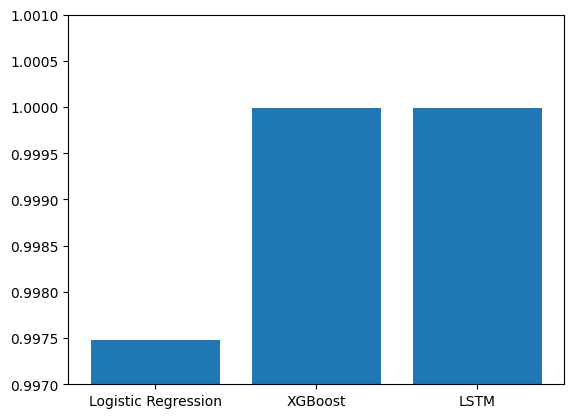

In [150]:
e=pd.DataFrame(e)
plt.bar(x=e.columns,height=e.loc['AUC-ROC',:])
plt.ylim(0.997,1.001)

Class for reshaping the Dataset from 2D to 3D in the Data pipeline

In [132]:
class ReshapeTransformer():
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Reshape the data to (n_samples, 1, n_features)
        return X.reshape(X.shape[0], 1, X.shape[1])

Implementation of the Data Pipeline

In [133]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('std', StandardScaler()),('reshape', ReshapeTransformer()),('nn',nns)], verbose = True)
pipe.fit(X_trains, y_trains)

[Pipeline] ............... (step 1 of 3) Processing std, total=   0.1s
[Pipeline] ........... (step 2 of 3) Processing reshape, total=   0.0s
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9999 - loss: 2.7666e-04
[Pipeline] ................ (step 3 of 3) Processing nn, total=  25.5s


Pipeline(steps=[('std', StandardScaler()),
                ('reshape',
                 <__main__.ReshapeTransformer object at 0x7afb68442cd0>),
                ('nn', <Sequential name=sequential_12, built=True>)],
         verbose=True)

Uploading the Model to Pickel

In [134]:
import pickle
with open('asse.pkl', 'wb') as file:
    pickle.dump(pipe, file)